Epoch 1/20
157/157 - 5s - 31ms/step - accuracy: 0.2991 - loss: 1.9326 - val_accuracy: 0.2919 - val_loss: 1.9723
Epoch 2/20
157/157 - 3s - 17ms/step - accuracy: 0.4161 - loss: 1.6189 - val_accuracy: 0.4278 - val_loss: 1.6011
Epoch 3/20
157/157 - 1s - 9ms/step - accuracy: 0.4761 - loss: 1.4595 - val_accuracy: 0.4971 - val_loss: 1.4028
Epoch 4/20
157/157 - 3s - 16ms/step - accuracy: 0.5215 - loss: 1.3499 - val_accuracy: 0.5265 - val_loss: 1.3673
Epoch 5/20
157/157 - 2s - 15ms/step - accuracy: 0.5592 - loss: 1.2538 - val_accuracy: 0.5186 - val_loss: 1.4006
Epoch 6/20
157/157 - 1s - 8ms/step - accuracy: 0.5895 - loss: 1.1758 - val_accuracy: 0.5745 - val_loss: 1.1959
Epoch 7/20
157/157 - 1s - 8ms/step - accuracy: 0.6092 - loss: 1.1129 - val_accuracy: 0.5598 - val_loss: 1.2619
Epoch 8/20
157/157 - 3s - 17ms/step - accuracy: 0.6310 - loss: 1.0585 - val_accuracy: 0.6049 - val_loss: 1.1327
Epoch 9/20
157/157 - 1s - 8ms/step - accuracy: 0.6490 - loss: 1.0037 - val_accuracy: 0.5577 - val_loss: 1.2

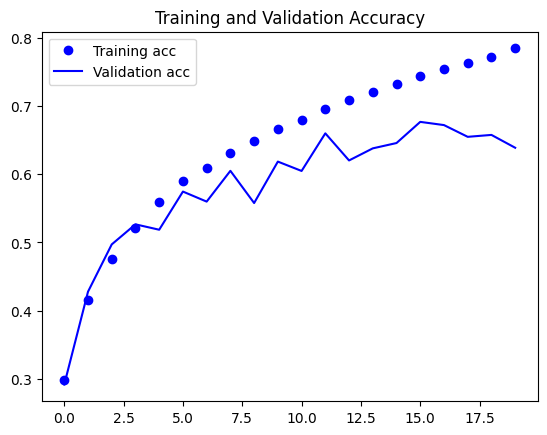

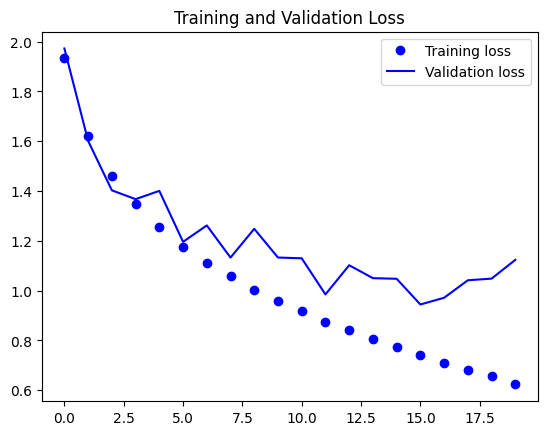

Final Training Accuracy: 0.7841
Final Validation Accuracy: 0.6387
Final Training Loss: 0.6233
Final Validation Loss: 1.1236


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

(train_x, train_y), (test_x, test_y) = cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

train_x = train_x / 255.
test_x = test_x / 255.

from tensorflow.keras.utils import to_categorical

train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

# CNN 모델 디자인
from tensorflow.keras import models, layers

model = models.Sequential()

# (32, 32, 3) => (30, 30, 32)
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(32, 32, 3)))
# (30, 30, 32) => (15, 15, 32)
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# (15, 15, 32) => (13, 13, 64)
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3),
                        activation='relu'))

# (13, 13, 64) => (6, 6, 64)
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# (6, 6, 64) => (4, 4, 64)
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3),
                        activation='relu'))

# 3D를 1D로 변환
model.add(layers.Flatten())

# Classification : Fully Connected Layer 추가
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

# 모델의 학습 정보 설정
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(x=train_x, y=train_y, epochs=20, batch_size=256, verbose=2, validation_split=0.2)

model.save('best_model.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# 모델 학습 결과에서 마지막 에포크의 정확도와 손실 값을 확인합니다.
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_y[i].argmax()])
plt.show()

In [ ]:
print(f'훈련 데이터 수: {len(train_x)}장')
print(f'테스트 데이터 수: {len(test_x)}장')
print(f'총 데이터 수: {len(train_x) + len(test_x)}장')

훈련 데이터 수: 50000장
테스트 데이터 수: 10000장
총 데이터 수: 60000장


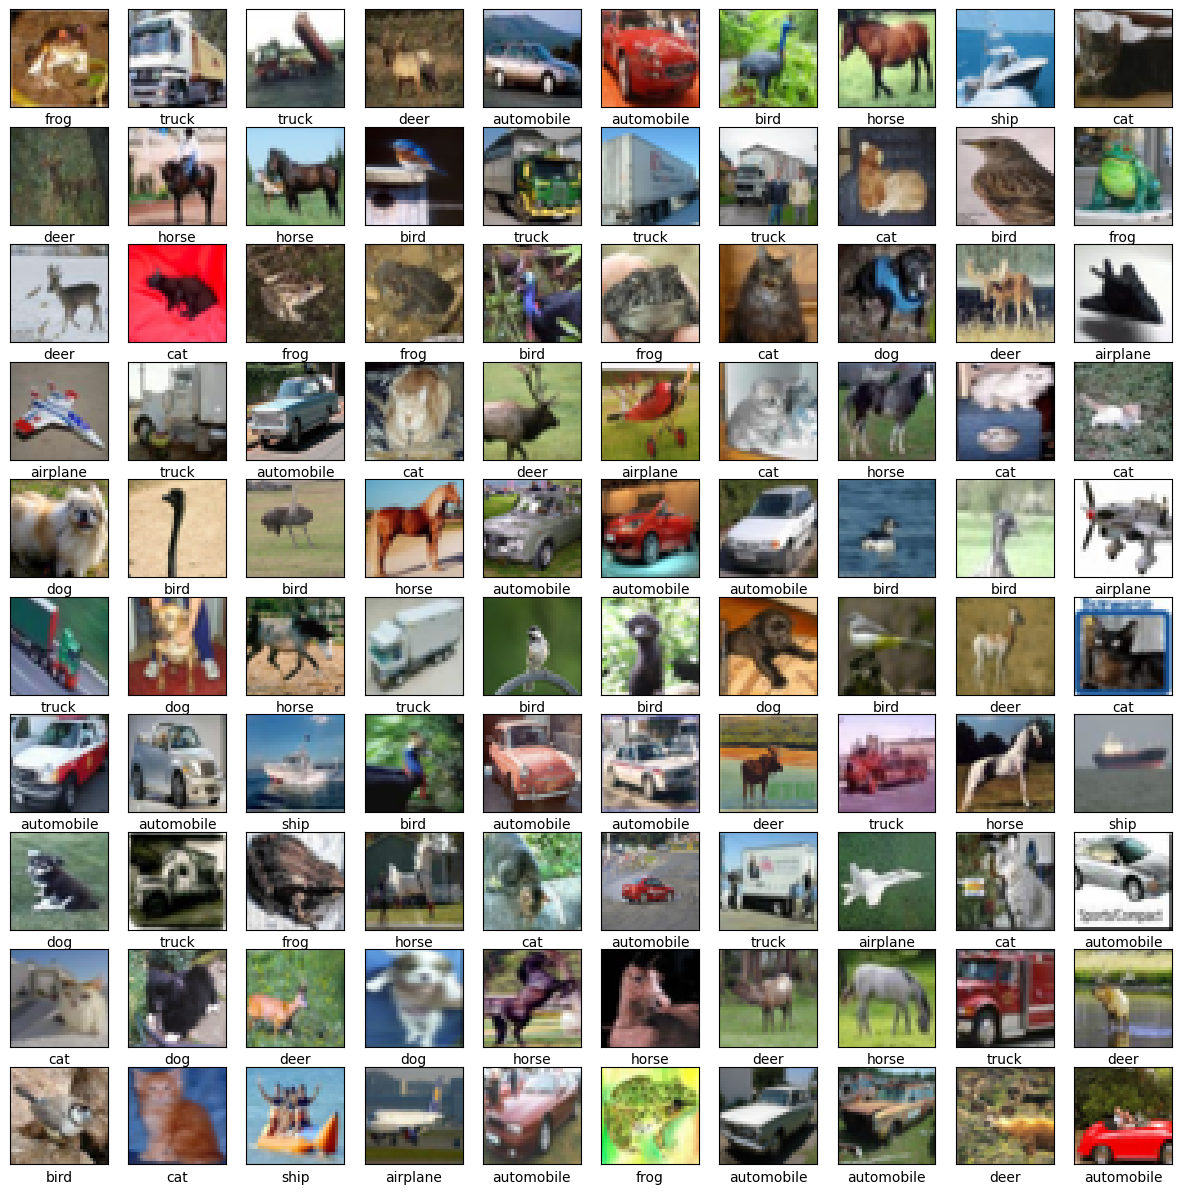

In [ ]:
plt.figure(figsize=(15, 15))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_y[i].argmax()])
plt.show()

Epoch 1/20
157/157 - 8s - 49ms/step - accuracy: 0.2672 - loss: 1.9974 - val_accuracy: 0.2864 - val_loss: 2.0204
Epoch 2/20
157/157 - 5s - 34ms/step - accuracy: 0.3895 - loss: 1.6852 - val_accuracy: 0.4312 - val_loss: 1.5840
Epoch 3/20
157/157 - 2s - 15ms/step - accuracy: 0.4487 - loss: 1.5302 - val_accuracy: 0.4763 - val_loss: 1.4680
Epoch 4/20
157/157 - 1s - 8ms/step - accuracy: 0.4930 - loss: 1.4180 - val_accuracy: 0.5192 - val_loss: 1.3434
Epoch 5/20
157/157 - 3s - 16ms/step - accuracy: 0.5247 - loss: 1.3396 - val_accuracy: 0.5113 - val_loss: 1.3669
Epoch 6/20
157/157 - 1s - 8ms/step - accuracy: 0.5477 - loss: 1.2741 - val_accuracy: 0.5074 - val_loss: 1.3711
Epoch 7/20
157/157 - 1s - 8ms/step - accuracy: 0.5684 - loss: 1.2154 - val_accuracy: 0.5524 - val_loss: 1.2784
Epoch 8/20
157/157 - 1s - 8ms/step - accuracy: 0.5893 - loss: 1.1608 - val_accuracy: 0.6048 - val_loss: 1.1398
Epoch 9/20
157/157 - 3s - 17ms/step - accuracy: 0.6072 - loss: 1.1182 - val_accuracy: 0.5543 - val_loss: 1.2

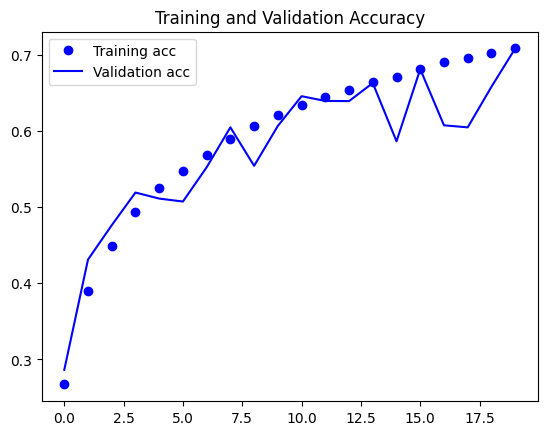

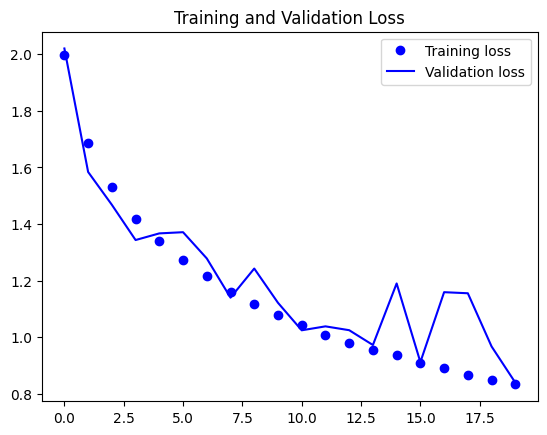

Final Training Accuracy: 0.7084
Final Validation Accuracy: 0.7083
Final Training Loss: 0.8330
Final Validation Loss: 0.8396


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

# 데이터셋 로딩 및 정규화
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x, test_x = train_x / 255.0, test_x / 255.0
train_y, test_y = to_categorical(train_y), to_categorical(test_y)

# 모델 구성 (Conv → MaxPool → Conv → MaxPool → Conv → Flatten → Dropout → Dense → Output)
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  # ← Dropout 추가 (변경점 1줄)

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 컴파일 및 학습
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=20, batch_size=256, validation_split=0.2, verbose=2)

# 결과 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# 최종 성능 출력
print(f"Final Training Accuracy: {acc[-1]:.4f}")
print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")
print(f"Final Training Loss: {loss[-1]:.4f}")
print(f"Final Validation Loss: {val_loss[-1]:.4f}")


Epoch 1/20
157/157 - 7s - 42ms/step - accuracy: 0.2725 - loss: 1.9787 - val_accuracy: 0.3783 - val_loss: 1.7481
Epoch 2/20
157/157 - 2s - 11ms/step - accuracy: 0.4006 - loss: 1.6553 - val_accuracy: 0.4293 - val_loss: 1.5940
Epoch 3/20
157/157 - 2s - 15ms/step - accuracy: 0.4614 - loss: 1.5053 - val_accuracy: 0.4967 - val_loss: 1.4189
Epoch 4/20
157/157 - 1s - 8ms/step - accuracy: 0.5038 - loss: 1.3985 - val_accuracy: 0.4715 - val_loss: 1.4531
Epoch 5/20
157/157 - 1s - 8ms/step - accuracy: 0.5339 - loss: 1.3126 - val_accuracy: 0.5532 - val_loss: 1.2833
Epoch 6/20
157/157 - 3s - 16ms/step - accuracy: 0.5626 - loss: 1.2461 - val_accuracy: 0.5507 - val_loss: 1.2353
Epoch 7/20
157/157 - 3s - 17ms/step - accuracy: 0.5821 - loss: 1.1833 - val_accuracy: 0.4807 - val_loss: 1.4965
Epoch 8/20
157/157 - 2s - 10ms/step - accuracy: 0.5992 - loss: 1.1346 - val_accuracy: 0.5847 - val_loss: 1.1709
Epoch 9/20
157/157 - 2s - 15ms/step - accuracy: 0.6158 - loss: 1.0948 - val_accuracy: 0.6347 - val_loss: 1

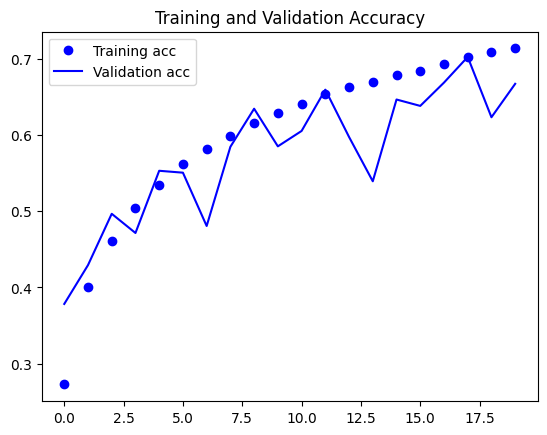

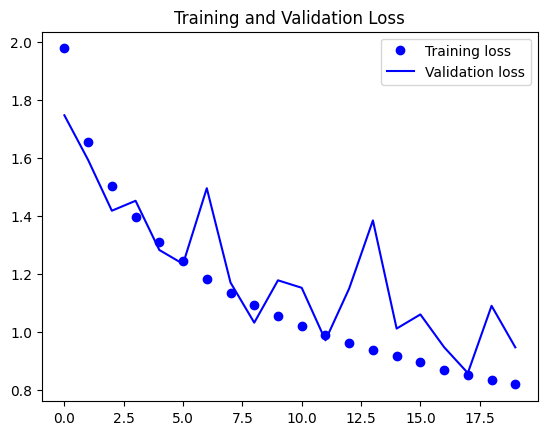

Final Training Accuracy: 0.7138
Final Validation Accuracy: 0.6674
Final Training Loss: 0.8192
Final Validation Loss: 0.9473


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

# 데이터 불러오기 및 전처리
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x = train_x / 255.
test_x = test_x / 255.
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

# 모델 정의
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Dropout 추가
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 컴파일
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 학습
history = model.fit(train_x, train_y,
                    epochs=20,
                    batch_size=256,
                    validation_split=0.2,
                    verbose=2)

# 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# 마지막 결과 출력
print(f"Final Training Accuracy: {acc[-1]:.4f}")
print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")
print(f"Final Training Loss: {loss[-1]:.4f}")
print(f"Final Validation Loss: {val_loss[-1]:.4f}")


Epoch 1/30
313/313 - 7s - 24ms/step - accuracy: 0.3767 - loss: 1.7423 - val_accuracy: 0.4172 - val_loss: 1.5941
Epoch 2/30
313/313 - 5s - 17ms/step - accuracy: 0.5203 - loss: 1.3648 - val_accuracy: 0.5415 - val_loss: 1.3098
Epoch 3/30
313/313 - 2s - 8ms/step - accuracy: 0.5850 - loss: 1.1846 - val_accuracy: 0.5951 - val_loss: 1.1662
Epoch 4/30
313/313 - 2s - 5ms/step - accuracy: 0.6305 - loss: 1.0644 - val_accuracy: 0.6033 - val_loss: 1.1546
Epoch 5/30
313/313 - 2s - 6ms/step - accuracy: 0.6634 - loss: 0.9683 - val_accuracy: 0.6110 - val_loss: 1.1111
Epoch 6/30
313/313 - 2s - 7ms/step - accuracy: 0.6905 - loss: 0.8878 - val_accuracy: 0.6398 - val_loss: 1.0359
Epoch 7/30
313/313 - 3s - 8ms/step - accuracy: 0.7190 - loss: 0.8147 - val_accuracy: 0.6406 - val_loss: 1.0432
Epoch 8/30
313/313 - 3s - 8ms/step - accuracy: 0.7426 - loss: 0.7445 - val_accuracy: 0.6540 - val_loss: 1.0492
Epoch 9/30
313/313 - 2s - 5ms/step - accuracy: 0.7640 - loss: 0.6817 - val_accuracy: 0.6855 - val_loss: 0.9508

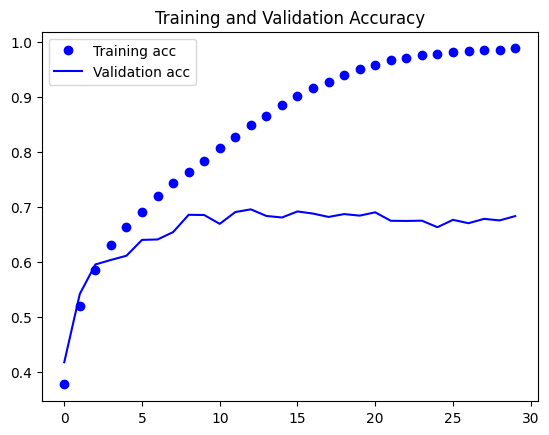

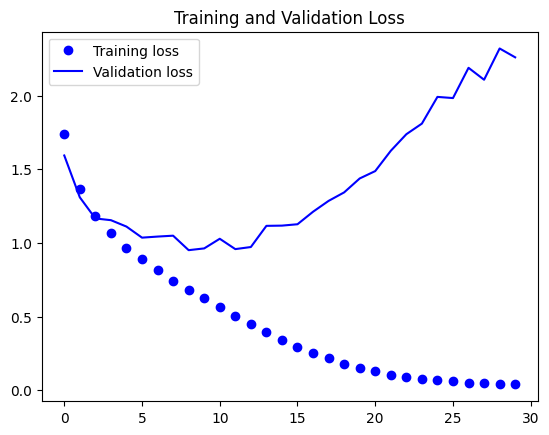

Final Training Accuracy: 0.9882
Final Validation Accuracy: 0.6831
Final Training Loss: 0.0383
Final Validation Loss: 2.2610


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

# 데이터셋 불러오기
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x, test_x = train_x / 255.0, test_x / 255.0
train_y, test_y = to_categorical(train_y), to_categorical(test_y)

# 모델 구성
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))  # Dense 크기 변경
model.add(layers.Dense(10, activation='softmax'))

# 컴파일
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 학습
history = model.fit(train_x, train_y,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=2)

# 결과 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# 최종 성능 출력
print(f"Final Training Accuracy: {acc[-1]:.4f}")
print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")
print(f"Final Training Loss: {loss[-1]:.4f}")
print(f"Final Validation Loss: {val_loss[-1]:.4f}")


Epoch 1/30
313/313 - 7s - 21ms/step - accuracy: 0.3726 - loss: 1.7471 - val_accuracy: 0.4308 - val_loss: 1.5949
Epoch 2/30
313/313 - 2s - 8ms/step - accuracy: 0.4855 - loss: 1.4384 - val_accuracy: 0.4944 - val_loss: 1.3916
Epoch 3/30
313/313 - 2s - 6ms/step - accuracy: 0.5444 - loss: 1.2860 - val_accuracy: 0.5620 - val_loss: 1.2207
Epoch 4/30
313/313 - 2s - 5ms/step - accuracy: 0.5775 - loss: 1.1864 - val_accuracy: 0.5656 - val_loss: 1.2771
Epoch 5/30
313/313 - 2s - 5ms/step - accuracy: 0.6089 - loss: 1.1112 - val_accuracy: 0.6155 - val_loss: 1.0879
Epoch 6/30
313/313 - 3s - 8ms/step - accuracy: 0.6305 - loss: 1.0552 - val_accuracy: 0.6090 - val_loss: 1.1064
Epoch 7/30
313/313 - 3s - 8ms/step - accuracy: 0.6479 - loss: 1.0051 - val_accuracy: 0.6680 - val_loss: 0.9671
Epoch 8/30
313/313 - 3s - 8ms/step - accuracy: 0.6635 - loss: 0.9614 - val_accuracy: 0.6683 - val_loss: 0.9516
Epoch 9/30
313/313 - 2s - 5ms/step - accuracy: 0.6727 - loss: 0.9264 - val_accuracy: 0.6872 - val_loss: 0.9118


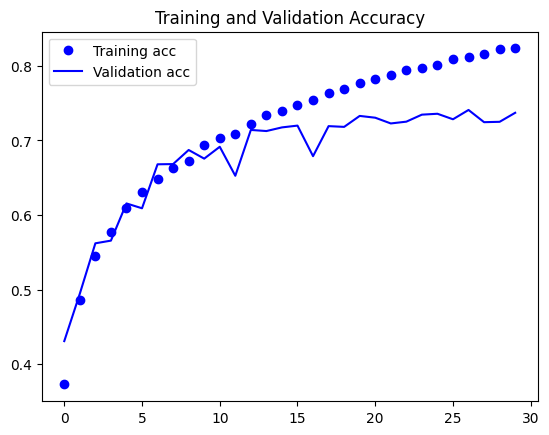

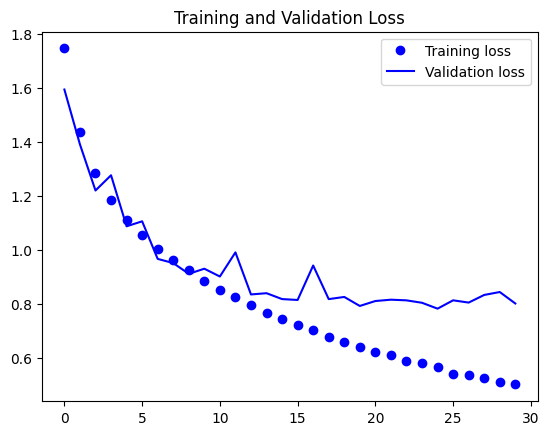

Final Training Accuracy: 0.8234
Final Validation Accuracy: 0.7371
Final Training Loss: 0.5015
Final Validation Loss: 0.8018


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

# 데이터 불러오기
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x, test_x = train_x / 255.0, test_x / 255.0
train_y, test_y = to_categorical(train_y), to_categorical(test_y)

# 모델 정의
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  # Dropout 적용
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 컴파일 및 학습
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_x, train_y, epochs=30, batch_size=128, validation_split=0.2, verbose=2)

# 결과 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# 최종 결과 출력
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")


Epoch 1/50
313/313 - 7s - 21ms/step - accuracy: 0.3088 - loss: 1.8889 - val_accuracy: 0.4046 - val_loss: 1.6197
Epoch 2/50
313/313 - 2s - 6ms/step - accuracy: 0.4627 - loss: 1.4897 - val_accuracy: 0.5240 - val_loss: 1.3262
Epoch 3/50
313/313 - 2s - 7ms/step - accuracy: 0.5376 - loss: 1.3002 - val_accuracy: 0.5630 - val_loss: 1.2342
Epoch 4/50
313/313 - 2s - 7ms/step - accuracy: 0.5917 - loss: 1.1569 - val_accuracy: 0.5902 - val_loss: 1.1523
Epoch 5/50
313/313 - 2s - 5ms/step - accuracy: 0.6291 - loss: 1.0493 - val_accuracy: 0.5499 - val_loss: 1.2946
Epoch 6/50
313/313 - 3s - 8ms/step - accuracy: 0.6621 - loss: 0.9602 - val_accuracy: 0.6259 - val_loss: 1.0755
Epoch 7/50
313/313 - 2s - 6ms/step - accuracy: 0.6921 - loss: 0.8769 - val_accuracy: 0.6572 - val_loss: 0.9908
Epoch 8/50
313/313 - 2s - 5ms/step - accuracy: 0.7162 - loss: 0.8054 - val_accuracy: 0.6907 - val_loss: 0.9135
Epoch 9/50
313/313 - 2s - 7ms/step - accuracy: 0.7411 - loss: 0.7424 - val_accuracy: 0.6715 - val_loss: 0.9597


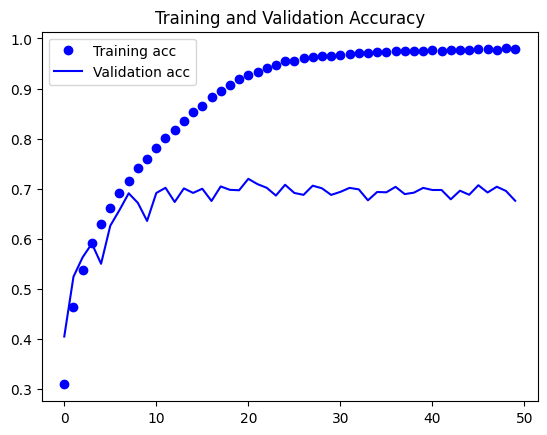

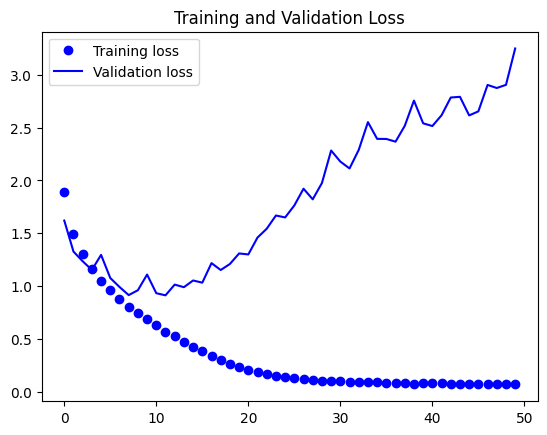

Final Training Accuracy: 0.9784
Final Validation Accuracy: 0.6758
Final Training Loss: 0.0675
Final Validation Loss: 3.2505


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

(train_x, train_y), (test_x, test_y) = cifar10.load_data()

train_x = train_x / 255.
test_x = test_x / 255.
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_x, train_y,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=2)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

print(f"Final Training Accuracy: {acc[-1]:.4f}")
print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")
print(f"Final Training Loss: {loss[-1]:.4f}")
print(f"Final Validation Loss: {val_loss[-1]:.4f}")


Epoch 1/50
313/313 - 13s - 40ms/step - accuracy: 0.3275 - loss: 1.8481 - val_accuracy: 0.3958 - val_loss: 1.6217
Epoch 2/50
313/313 - 3s - 11ms/step - accuracy: 0.4924 - loss: 1.4212 - val_accuracy: 0.5275 - val_loss: 1.3419
Epoch 3/50
313/313 - 4s - 12ms/step - accuracy: 0.5722 - loss: 1.2147 - val_accuracy: 0.6228 - val_loss: 1.0951
Epoch 4/50
313/313 - 4s - 11ms/step - accuracy: 0.6266 - loss: 1.0650 - val_accuracy: 0.6371 - val_loss: 1.0777
Epoch 5/50
313/313 - 5s - 16ms/step - accuracy: 0.6686 - loss: 0.9548 - val_accuracy: 0.6904 - val_loss: 0.8919
Epoch 6/50
313/313 - 5s - 17ms/step - accuracy: 0.7041 - loss: 0.8564 - val_accuracy: 0.7075 - val_loss: 0.8305
Epoch 7/50
313/313 - 3s - 11ms/step - accuracy: 0.7279 - loss: 0.7823 - val_accuracy: 0.6835 - val_loss: 0.9178
Epoch 8/50
313/313 - 3s - 11ms/step - accuracy: 0.7480 - loss: 0.7222 - val_accuracy: 0.7111 - val_loss: 0.8513
Epoch 9/50
313/313 - 5s - 17ms/step - accuracy: 0.7652 - loss: 0.6679 - val_accuracy: 0.7091 - val_loss

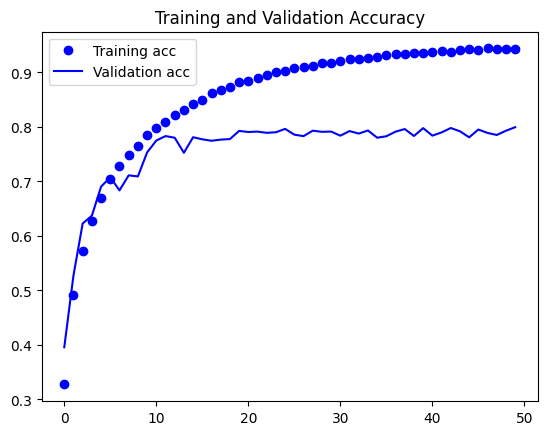

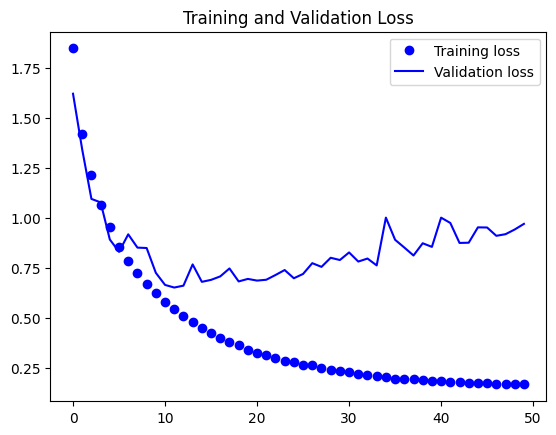

Final Training Accuracy: 0.9432
Final Validation Accuracy: 0.7994
Final Training Loss: 0.1688
Final Validation Loss: 0.9701


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

# 데이터셋 로드 및 전처리
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x, test_x = train_x / 255.0, test_x / 255.0
train_y, test_y = to_categorical(train_y), to_categorical(test_y)

# CNN 모델 구성
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 컴파일 및 학습
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_x, train_y,
                    epochs=50,
                    batch_size=128,
                    validation_split=0.2,
                    verbose=2)

# 학습 결과 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# 최종 정확도 및 손실 출력
print(f"Final Training Accuracy: {acc[-1]:.4f}")
print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")
print(f"Final Training Loss: {loss[-1]:.4f}")
print(f"Final Validation Loss: {val_loss[-1]:.4f}")


Epoch 1/30
625/625 - 8s - 12ms/step - accuracy: 0.3980 - loss: 1.6664 - val_accuracy: 0.5354 - val_loss: 1.3211
Epoch 2/30
625/625 - 8s - 12ms/step - accuracy: 0.5779 - loss: 1.2017 - val_accuracy: 0.5676 - val_loss: 1.2583
Epoch 3/30
625/625 - 5s - 8ms/step - accuracy: 0.6557 - loss: 0.9894 - val_accuracy: 0.6605 - val_loss: 0.9656
Epoch 4/30
625/625 - 4s - 6ms/step - accuracy: 0.7115 - loss: 0.8324 - val_accuracy: 0.7160 - val_loss: 0.8437
Epoch 5/30
625/625 - 5s - 8ms/step - accuracy: 0.7541 - loss: 0.6999 - val_accuracy: 0.7118 - val_loss: 0.8572
Epoch 6/30
625/625 - 4s - 6ms/step - accuracy: 0.7957 - loss: 0.5818 - val_accuracy: 0.7221 - val_loss: 0.8187
Epoch 7/30
625/625 - 4s - 6ms/step - accuracy: 0.8337 - loss: 0.4750 - val_accuracy: 0.7194 - val_loss: 0.9184
Epoch 8/30
625/625 - 5s - 8ms/step - accuracy: 0.8713 - loss: 0.3709 - val_accuracy: 0.7381 - val_loss: 0.9302
Epoch 9/30
625/625 - 3s - 6ms/step - accuracy: 0.8982 - loss: 0.2901 - val_accuracy: 0.7126 - val_loss: 1.1161

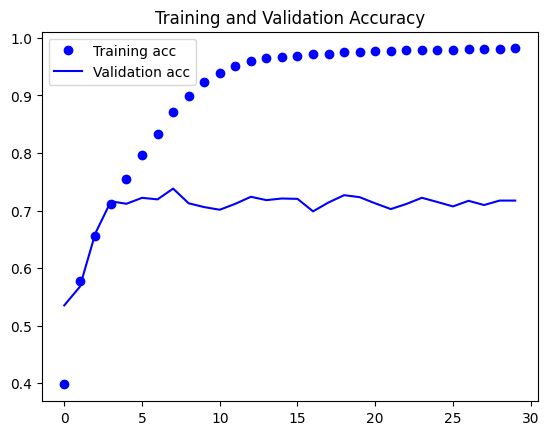

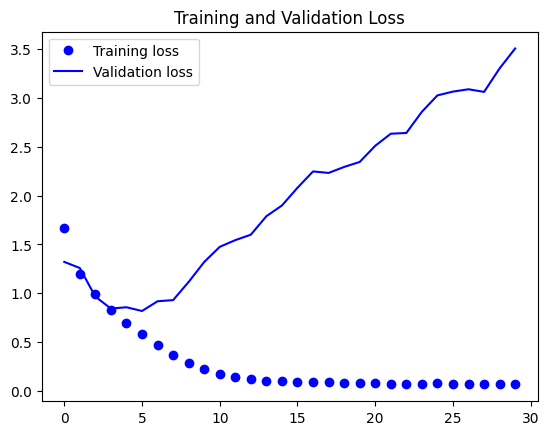

Final Training Accuracy: 0.9814
Final Validation Accuracy: 0.7173
Final Training Loss: 0.0672
Final Validation Loss: 3.5041


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

# 데이터 로딩 및 전처리
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x = train_x / 255.
test_x = test_x / 255.

train_y = to_categorical(train_y)
test_y = to_categorical(test_y)


# CNN 모델 구성
model = models.Sequential()

# Conv Block 1
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Conv Block 2
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Conv Block 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

# FC Layer
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 컴파일
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# 학습
history = model.fit(x=train_x, y=train_y, epochs=30, batch_size=64, verbose=2, validation_split=0.2)

# 정확도 및 손실 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# 최종 결과 출력
print(f"Final Training Accuracy: {acc[-1]:.4f}")
print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")
print(f"Final Training Loss: {loss[-1]:.4f}")
print(f"Final Validation Loss: {val_loss[-1]:.4f}")


Epoch 1/30
625/625 - 8s - 12ms/step - accuracy: 0.3724 - loss: 1.7113 - val_accuracy: 0.4842 - val_loss: 1.4422
Epoch 2/30
625/625 - 4s - 6ms/step - accuracy: 0.5432 - loss: 1.2882 - val_accuracy: 0.6187 - val_loss: 1.0978
Epoch 3/30
625/625 - 5s - 9ms/step - accuracy: 0.6135 - loss: 1.0985 - val_accuracy: 0.6374 - val_loss: 1.0157
Epoch 4/30
625/625 - 3s - 6ms/step - accuracy: 0.6580 - loss: 0.9771 - val_accuracy: 0.6730 - val_loss: 0.9669
Epoch 5/30
625/625 - 5s - 8ms/step - accuracy: 0.6906 - loss: 0.8867 - val_accuracy: 0.6832 - val_loss: 0.9232
Epoch 6/30
625/625 - 4s - 6ms/step - accuracy: 0.7162 - loss: 0.8176 - val_accuracy: 0.6925 - val_loss: 0.8788
Epoch 7/30
625/625 - 5s - 8ms/step - accuracy: 0.7339 - loss: 0.7579 - val_accuracy: 0.7369 - val_loss: 0.7719
Epoch 8/30
625/625 - 5s - 8ms/step - accuracy: 0.7554 - loss: 0.7108 - val_accuracy: 0.7451 - val_loss: 0.7502
Epoch 9/30
625/625 - 5s - 8ms/step - accuracy: 0.7679 - loss: 0.6663 - val_accuracy: 0.7510 - val_loss: 0.7467


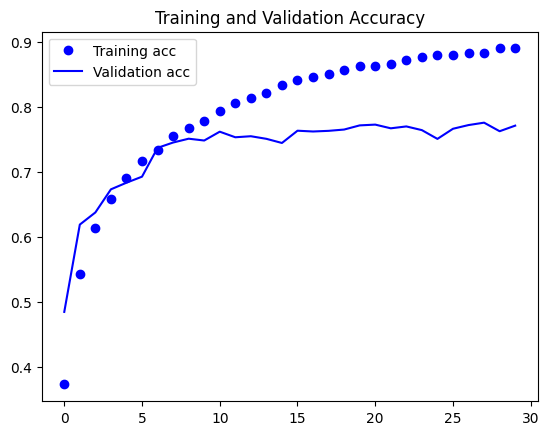

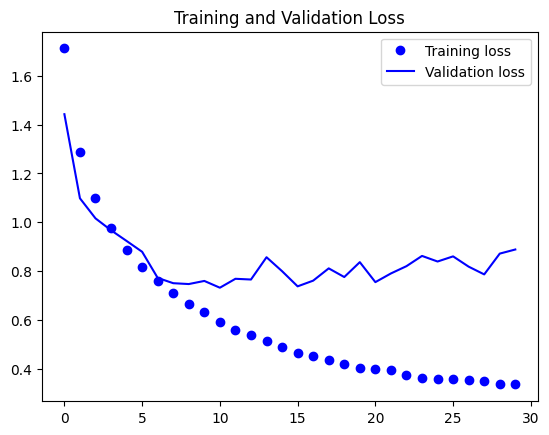

Final Training Accuracy: 0.8900
Final Validation Accuracy: 0.7711
Final Training Loss: 0.3372
Final Validation Loss: 0.8882


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

# Load and preprocess CIFAR-10
(train_x, train_y), (test_x, test_y) = cifar10.load_data()
train_x, test_x = train_x / 255.0, test_x / 255.0
train_y, test_y = to_categorical(train_y), to_categorical(test_y)

# Build CNN model
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))  # Dropout 적용
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(train_x, train_y,
                    epochs=30,
                    batch_size=64,
                    validation_split=0.2,
                    verbose=2)

# Plot results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Print final results
print(f"Final Training Accuracy: {acc[-1]:.4f}")
print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")
print(f"Final Training Loss: {loss[-1]:.4f}")
print(f"Final Validation Loss: {val_loss[-1]:.4f}")


Epoch 1/20
313/313 - 7s - 23ms/step - accuracy: 0.3931 - loss: 1.6936 - val_accuracy: 0.5066 - val_loss: 1.3870
Epoch 2/20
313/313 - 3s - 8ms/step - accuracy: 0.5534 - loss: 1.2731 - val_accuracy: 0.5821 - val_loss: 1.1910
Epoch 3/20
313/313 - 2s - 8ms/step - accuracy: 0.6215 - loss: 1.0814 - val_accuracy: 0.6341 - val_loss: 1.0592
Epoch 4/20
313/313 - 3s - 9ms/step - accuracy: 0.6651 - loss: 0.9612 - val_accuracy: 0.6208 - val_loss: 1.0949
Epoch 5/20
313/313 - 5s - 16ms/step - accuracy: 0.7056 - loss: 0.8533 - val_accuracy: 0.6743 - val_loss: 0.9517
Epoch 6/20
313/313 - 2s - 8ms/step - accuracy: 0.7394 - loss: 0.7506 - val_accuracy: 0.6646 - val_loss: 0.9914
Epoch 7/20
313/313 - 3s - 8ms/step - accuracy: 0.7731 - loss: 0.6563 - val_accuracy: 0.6716 - val_loss: 1.0035
Epoch 8/20
313/313 - 3s - 10ms/step - accuracy: 0.8062 - loss: 0.5641 - val_accuracy: 0.6890 - val_loss: 0.9430
Epoch 9/20
313/313 - 3s - 8ms/step - accuracy: 0.8365 - loss: 0.4787 - val_accuracy: 0.7171 - val_loss: 0.916

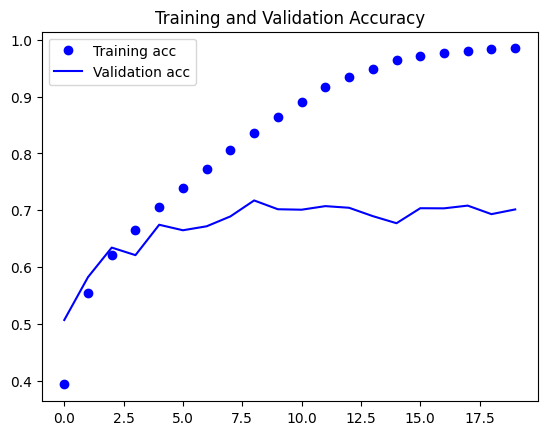

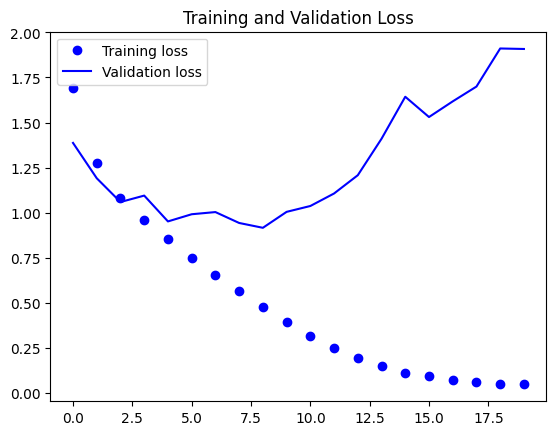

Final Training Accuracy: 0.9847
Final Validation Accuracy: 0.7013
Final Training Loss: 0.0474
Final Validation Loss: 1.9080


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

# 데이터셋 불러오기
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 정규화
train_x = train_x / 255.
test_x = test_x / 255.

# One-hot encoding
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

# CNN 모델 설계
model = models.Sequential()

# Conv Layer 1: (32, 32, 3) → (30, 30, 64) → (15, 15, 64)
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Conv Layer 2: (15, 15, 64) → (13, 13, 128) → (6, 6, 128)
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))

# Flatten
model.add(layers.Flatten())

# Fully Connected Layer
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(x=train_x, y=train_y,
                    epochs=20,
                    batch_size=128,
                    verbose=2,
                    validation_split=0.2)

# 학습 결과 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# 최종 성능 출력
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.3089 - loss: 1.9087 - val_accuracy: 0.5149 - val_loss: 1.4033
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5518 - loss: 1.2780 - val_accuracy: 0.6125 - val_loss: 1.0905
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6158 - loss: 1.0964 - val_accuracy: 0.6123 - val_loss: 1.1107
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6575 - loss: 0.9781 - val_accuracy: 0.6273 - val_loss: 1.0576
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6858 - loss: 0.9010 - val_accuracy: 0.6904 - val_loss: 0.8933
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7050 - loss: 0.8392 - val_accuracy: 0.7101 - val_loss: 0.8359
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7274 - loss: 0.7715 - val_accuracy: 0.6735 - val_loss: 0.9427
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7441 - loss: 0.7357 - val_accuracy:

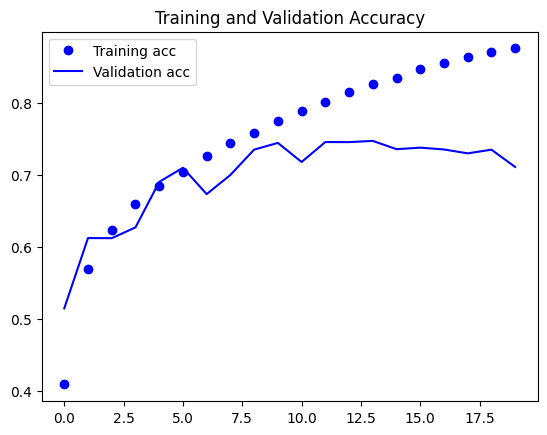

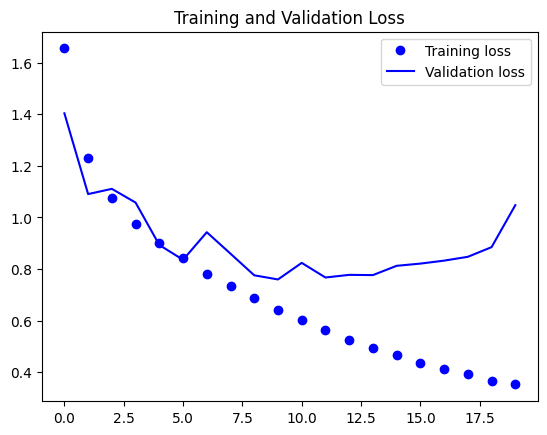

Final Training Accuracy: 0.8757
Final Validation Accuracy: 0.7112
Final Training Loss: 0.3530
Final Validation Loss: 1.0475


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 구성
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 컴파일
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 학습
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_test, y_test))

# 결과 시각화
plt.plot(history.history['accuracy'], 'bo', label='Training acc')
plt.plot(history.history['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(history.history['loss'], 'bo', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# 최종 성능 출력
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# 데이터 불러오기 및 전처리
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 모델 구성
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))  # Dense layer: 64 units
# Dropout 없음
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(train_images, train_labels,
                    epochs=30,
                    batch_size=256,
                    validation_data=(test_images, test_labels))

# 학습 결과 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(6, 9))

plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 결과 출력
print("Final Training Accuracy:", round(acc[-1], 4))
print("Final Validation Accuracy:", round(val_acc[-1], 4))
print("Final Training Loss:", round(loss[-1], 4))
print("Final Validation Loss:", round(val_loss[-1], 4))


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 데이터 로딩 및 전처리
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# 모델 구성 (3 conv layers, dropout=0.5, dense=64)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 컴파일
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 학습
history = model.fit(x_train, y_train, epochs=30, batch_size=256,
                    validation_data=(x_test, y_test))

# 결과 시각화
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(8, 10))

plt.subplot(2, 1, 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print("Final Training Accuracy:", acc[-1])
print("Final Validation Accuracy:", val_acc[-1])
print("Final Training Loss:", loss[-1])
print("Final Validation Loss:", val_loss[-1])
